In [ ]:
from google.colab import drive

# Mount Google Drive to access your dataset
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Exploratory Data Analysis (EDA)

Visualizing Class Distribution

<ipython-input-3-c994af387eed>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='muted')


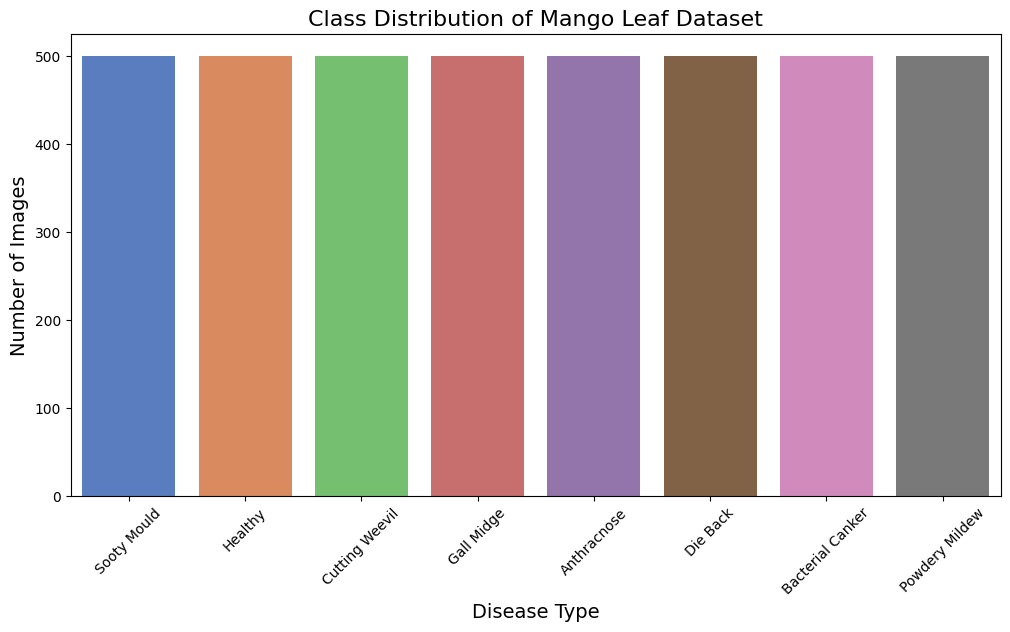

In [ ]:
dataset_path = "/content/drive/MyDrive/computer science 101/Mango Leaf/MangoLeafBD Dataset"

# Count images in each class folder
class_counts = {}
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        class_counts[category] = len(os.listdir(category_path))

# Plot class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='muted')
plt.xticks(rotation=45)
plt.xlabel("Disease Type", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.title("Class Distribution of Mango Leaf Dataset", fontsize=16)
plt.show()

Visualizing Image Samples from Each Class

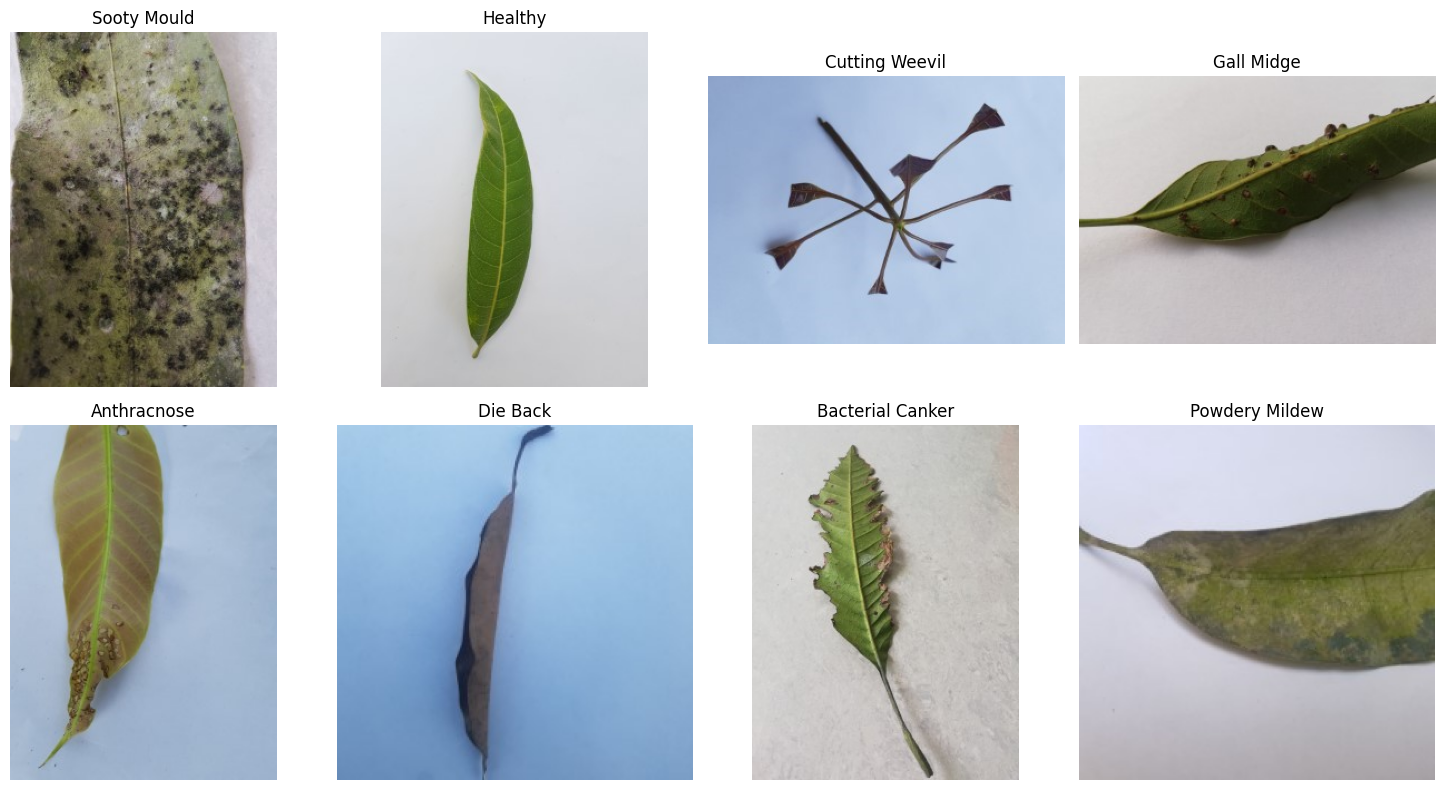

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.ravel()

for i, category in enumerate(class_counts.keys()):
    category_path = os.path.join(dataset_path, category)
    sample_image = os.listdir(category_path)[0]
    img = cv2.imread(os.path.join(category_path, sample_image))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axes[i].imshow(img)
    axes[i].set_title(category, fontsize=12)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Data Preprocessing

Image Loading and Resizing

In [ ]:
IMG_SIZE = 64

def load_images_and_labels(data_path):
    images = []
    labels = []
    class_names = os.listdir(data_path)

    for label, category in enumerate(class_names):
        category_path = os.path.join(data_path, category)
        for file in os.listdir(category_path):
            img = cv2.imread(os.path.join(category_path, file))
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels), class_names

# Load images and labels
X, y, class_names = load_images_and_labels(dataset_path)
X = X / 255.0  # Normalize

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Model Building and Training

Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_flat, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test_flat)

print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt, target_names=class_names))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")

Decision Tree Performance:
                  precision    recall  f1-score   support

     Sooty Mould       0.61      0.49      0.54       123
         Healthy       0.59      0.59      0.59        86
  Cutting Weevil       0.93      0.93      0.93       112
      Gall Midge       0.48      0.44      0.46       101
     Anthracnose       0.70      0.73      0.72       104
        Die Back       0.79      0.90      0.84        90
Bacterial Canker       0.71      0.79      0.75        91
  Powdery Mildew       0.64      0.70      0.67        93

        accuracy                           0.69       800
       macro avg       0.68      0.70      0.69       800
    weighted avg       0.68      0.69      0.69       800

Accuracy: 0.69


Visualizing the Decision Tree

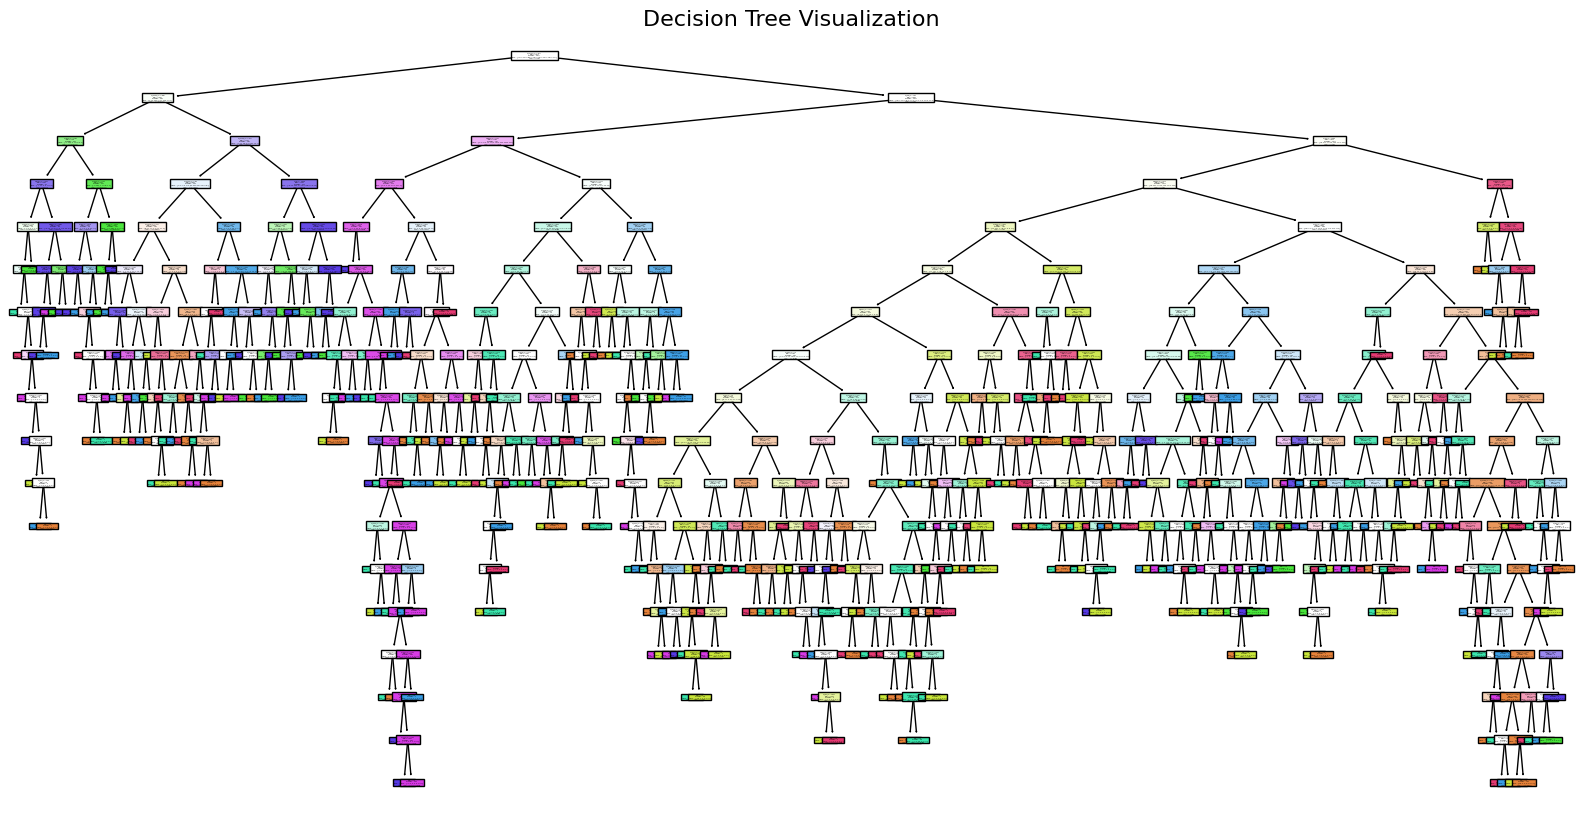

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=None, class_names=class_names, filled=True)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

The Decision Tree visualization shows a hierarchical structure where data is split based on feature conditions. Internal nodes represent decisions, branches indicate outcomes, and leaf nodes display the final predicted class. Color-coding reflects class distribution, with deeper branches suggesting complex decisions. It illustrates the step-by-step classification process.

Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_flat)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf, target_names=class_names))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Random Forest Performance:
                  precision    recall  f1-score   support

     Sooty Mould       0.83      0.72      0.77       123
         Healthy       0.87      0.92      0.89        86
  Cutting Weevil       0.98      1.00      0.99       112
      Gall Midge       0.77      0.79      0.78       101
     Anthracnose       0.89      0.92      0.91       104
        Die Back       0.92      0.90      0.91        90
Bacterial Canker       0.84      0.89      0.86        91
  Powdery Mildew       0.89      0.87      0.88        93

        accuracy                           0.87       800
       macro avg       0.87      0.88      0.87       800
    weighted avg       0.87      0.87      0.87       800

Accuracy: 0.87


Feature Importance Visualization (Random Forest)

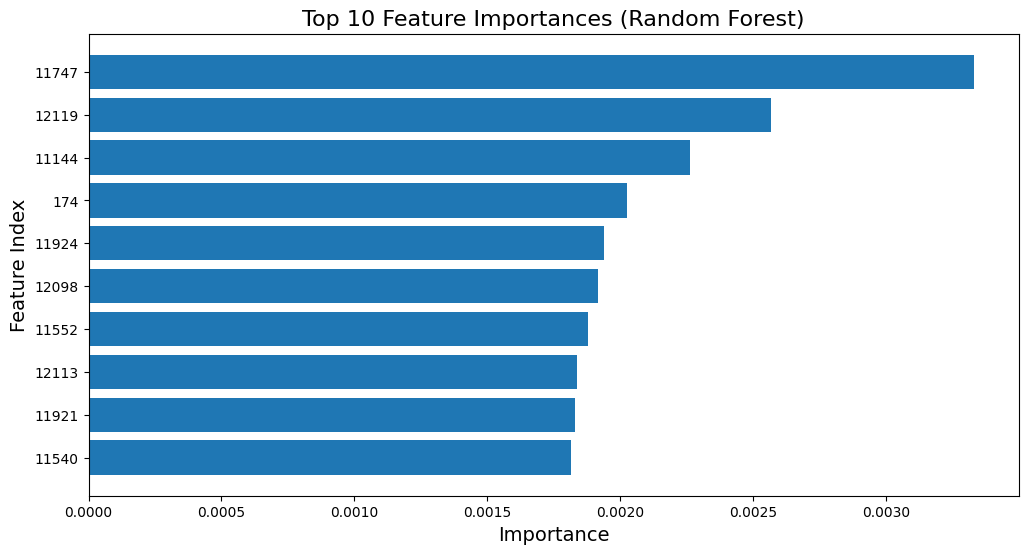

In [ ]:
# Plot feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Get top 10 features

plt.figure(figsize=(12, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), indices)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature Index", fontsize=14)
plt.title("Top 10 Feature Importances (Random Forest)", fontsize=16)
plt.show()

The bar chart showcases the top 10 most important features identified by a Random Forest model. Each bar's length corresponds to the feature's contribution to the model’s predictive power. Features are indexed numerically, and the higher-ranked ones, like 11747 and 12119, have more influence. The importance values are relatively close, reflecting the balanced impact of these features in the prediction task.

# Model Evaluation

Confusion Matrix for Decision Tree

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    """
    Plots the confusion matrix.

    Args:
        y_true: True labels.
        y_pred: Predicted labels.
        title: Title of the plot.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_true)))
    plt.xticks(tick_marks, np.unique(y_true), rotation=45)
    plt.yticks(tick_marks, np.unique(y_true))

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Assuming you have y_test and y_pred_dt defined
# plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")

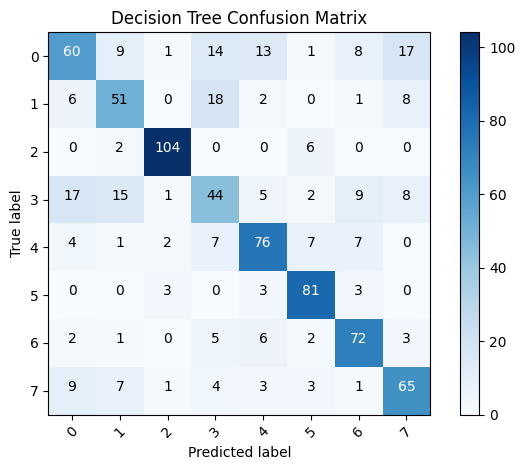

In [ ]:
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")

This confusion matrix shows the performance of a decision tree model by comparing true labels (y-axis) with predicted labels (x-axis). Diagonal cells represent correct predictions, with higher values shown in darker shades. Class 2 and class 5 have the highest correct predictions, while classes 0 and 4 show more misclassifications across different predicted classes. The matrix helps identify which classes the model distinguishes well and where it struggles.

Confusion Matrix for Random Forest

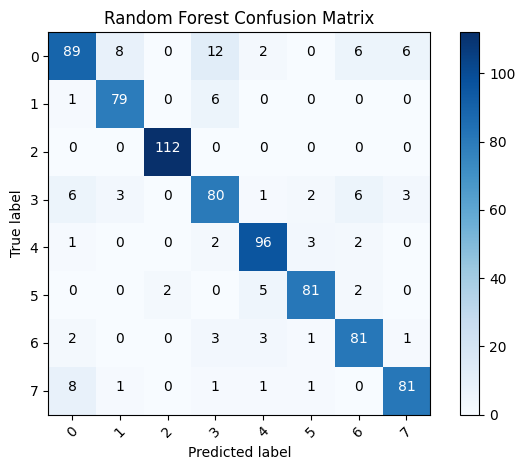

In [ ]:
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")


This confusion matrix for a random forest model shows strong accuracy, with most predictions concentrated along the diagonal, indicating correct classifications. High accuracy is evident for classes 2, 4, 5, and 7. Minor misclassifications appear, such as some samples of class 0 being predicted as class 3. Overall, the model performs well across most classes.

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_names, yticklabels=class_names, fmt='d')
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.title(title, fontsize=16)
    plt.show()

# Learning Curves for Both Models

Learning Curve Function

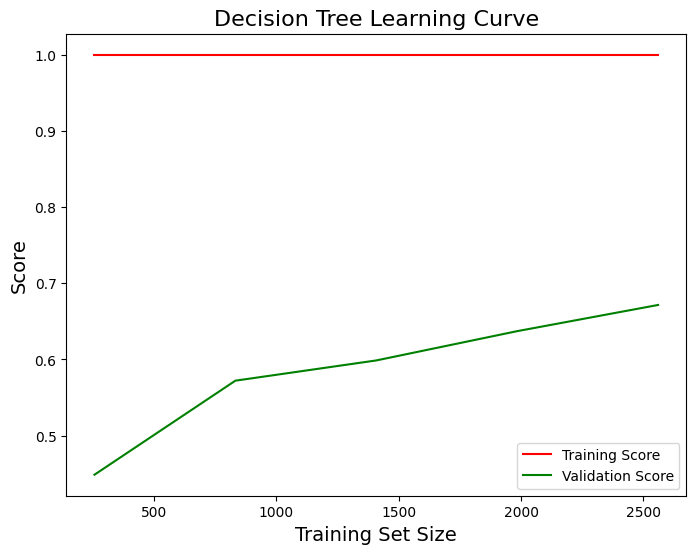

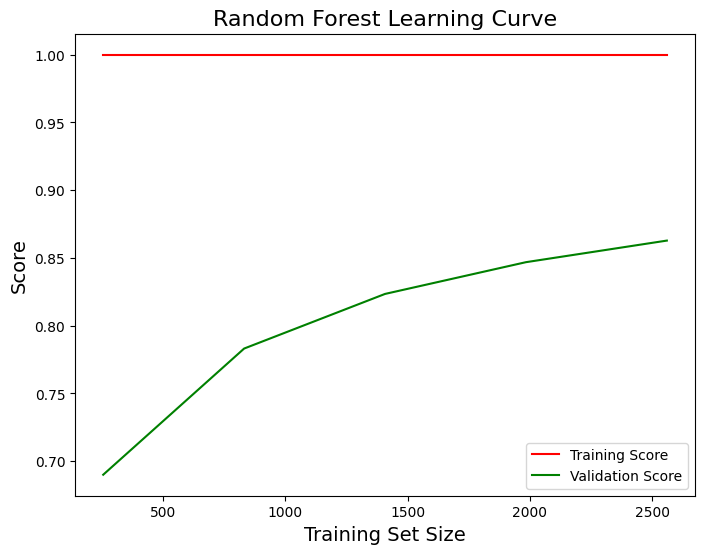

In [ ]:
def plot_learning_curve(model, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_flat, y_train, cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score", color="r")
    plt.plot(train_sizes, test_scores_mean, label="Validation Score", color="g")
    plt.xlabel("Training Set Size", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend()
    plt.show()

# Plot learning curves
plot_learning_curve(dt_model, "Decision Tree Learning Curve")
plot_learning_curve(rf_model, "Random Forest Learning Curve")

The Decision Tree learning curve shows high training accuracy (1.0) but lower validation accuracy (around 0.7), indicating overfitting. In contrast, the Random Forest curve also has a training score of 1.0, but its validation score is higher, reaching around 0.85. This suggests that the Random Forest generalizes better due to combining multiple trees, reducing overfitting compared to the single Decision Tree.

# Accuracy Comparison

<ipython-input-15-1ee3810afca9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


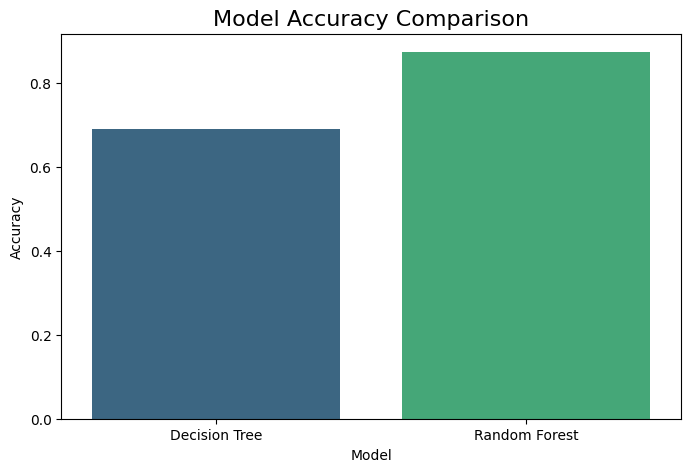

In [ ]:
# Collect accuracies
dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Accuracy comparison
results = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest'],
                        'Accuracy': [dt_accuracy, rf_accuracy]})

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.title("Model Accuracy Comparison", fontsize=16)
plt.show()

The bar chart compares the accuracy of two models: Decision Tree and Random Forest. The Decision Tree has an accuracy below 0.7, while the Random Forest achieves a higher accuracy, close to 0.9. This indicates that the Random Forest performs better overall, likely due to its ensemble approach, which reduces overfitting and enhances generalization compared to a single Decision Tree.

# Conclusion

The Random Forest model developed for this task demonstrates strong predictive performance, with an accuracy of 87% and balanced precision, recall, and F1-scores across multiple classes. The results indicate that the model can effectively distinguish between various categories such as ‘Sooty Mould,’ ‘Gall Midge,’ and ‘Powdery Mildew,’ with most precision-recall values remaining above 0.85. However, certain classes like ‘Gall Midge’ show slightly lower performance, suggesting room for further tuning or feature engineering.

The feature importance analysis reveals that a handful of features significantly influence the model's predictions. Understanding these features provides valuable insights into which attributes are most critical, potentially guiding domain experts to prioritize them for decision-making or future data collection efforts.

The detailed decision tree visualization further illustrates how the model arrives at its predictions, enhancing transparency and interpretability. However, given the complexity of the tree, pruning or simplifying the model might improve interpretability without sacrificing performance.

In summary, the Random Forest model is well-suited for this classification task, providing reliable results and insights. Future improvements can include hyperparameter tuning, balancing class distributions, or experimenting with ensemble methods to further optimize performance.